In [136]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

In [137]:
features_num = 1
num = 220

In [138]:
Train_dataset = np.loadtxt('trainset(2)/J0003_0024_0222_20110307012737_cell_7.csv',delimiter=",", skiprows=1)
Test_dataset = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_03.csv',delimiter=",", skiprows=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Train_dataset = scaler.fit_transform(Train_dataset)
Test_dataset = scaler.fit_transform(Test_dataset)
print(Train_dataset)

X_train = Train_dataset[:, 0:features_num]
Y_train = Train_dataset[:, 0]



[[0.         0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.00291545 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.0058309  0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.00874636 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01166181 0.         0.        ]
 [0.01457726 0.         0.        ]
 [0.01749271 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02332362 0.         0.        ]
 [0.02623907 0.         0.        ]
 [0.02040816 0.         0.  

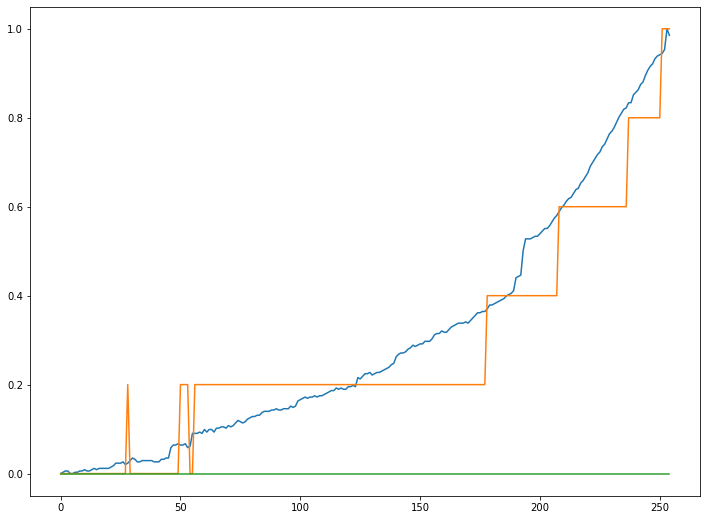

In [139]:
X_test = Train_dataset[num:250, 0:features_num]
Y_test = Train_dataset[num:250, 0]
r_x_test = Test_dataset[:,0:features_num]
r_y_test = Test_dataset[:,0]
plt.figure(figsize=(12, 9))
plt.plot(Train_dataset)

In [140]:
def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data[i:i+window_size]))
        label_list.append(np.array(label[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [141]:
train_feature, train_label = make_dataset(X_train, Y_train, 10)

In [142]:
test_feature, test_label = make_dataset(r_x_test, r_y_test, 10)

test_feature.shape, test_label.shape
print(test_feature.shape, test_label.shape)

(248, 10, 1) (248,)


In [143]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
print(x_train.shape, x_valid.shape)

(196, 10, 1) (49, 10, 1)


In [144]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(32,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
          )
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1))

In [145]:
model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(lr=0.01),
                metrics=[tf.metrics.MeanAbsoluteError()])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, mode='min')
filename = os.path.join('models/', 'tmp_checkpointcell7_GRU_onefeature.h5')
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [146]:
history = model.fit(x_train, y_train,
                                    epochs=50,
                                    batch_size=1, steps_per_epoch=200,
                                    validation_data=(x_valid, y_valid),
                                    callbacks=[checkpoint])

Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.0365 - mean_absolute_error: 0.0905 - val_loss: 2.2880e-04 - val_mean_absolute_error: 0.0121

Epoch 00001: val_loss improved from inf to 0.00023, saving model to models\tmp_checkpointcell7_GRU_onefeature.h5
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_absolute_error: 0.0308 - val_loss: 0.0016 - val_mean_absolute_error: 0.0378

Epoch 00002: val_loss did not improve from 0.00023
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 5.9708e-04 - mean_absolute_error: 0.0174 - val_loss: 2.6224e-04 - val_mean_absolute_error: 0.0144

Epoch 00003: val_loss did not improve from 0.00023
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_absolute_error: 0.0242 - val_loss: 1.0924e-04 - val_mean_absolute_error: 0.0081

Epoch 00004: val_loss improved from 0.00023 to 0.00011, saving model to models\tmp_checkpointcell7_GRU_onefea


Epoch 00035: val_loss did not improve from 0.00001
Epoch 36/50
200/200 [==============================] - 0s 2ms/step - loss: 7.4714e-05 - mean_absolute_error: 0.0070 - val_loss: 2.3896e-05 - val_mean_absolute_error: 0.0041

Epoch 00036: val_loss did not improve from 0.00001
Epoch 37/50
200/200 [==============================] - 0s 2ms/step - loss: 2.3987e-04 - mean_absolute_error: 0.0113 - val_loss: 3.2730e-05 - val_mean_absolute_error: 0.0050

Epoch 00037: val_loss did not improve from 0.00001
Epoch 38/50
200/200 [==============================] - 1s 3ms/step - loss: 1.5543e-04 - mean_absolute_error: 0.0090 - val_loss: 2.2298e-05 - val_mean_absolute_error: 0.0039

Epoch 00038: val_loss did not improve from 0.00001
Epoch 39/50
200/200 [==============================] - 1s 3ms/step - loss: 1.7455e-04 - mean_absolute_error: 0.0099 - val_loss: 9.1629e-05 - val_mean_absolute_error: 0.0074

Epoch 00039: val_loss did not improve from 0.00001
Epoch 40/50
200/200 [===========================

In [147]:
model.load_weights(filename)
pred = model.predict(test_feature)
print(pred)

[[0.06056797]
 [0.13699822]
 [0.14541139]
 [0.14633062]
 [0.10370561]
 [0.0565678 ]
 [0.13653317]
 [0.10263581]
 [0.1417033 ]
 [0.0606273 ]
 [0.09432127]
 [0.09806249]
 [0.09848308]
 [0.14123513]
 [0.06057526]
 [0.09431494]
 [0.09806173]
 [0.14118646]
 [0.18874304]
 [0.23679498]
 [0.24168946]
 [0.24218908]
 [0.24224111]
 [0.11348334]
 [0.1857848 ]
 [0.19344608]
 [0.19425237]
 [0.15144058]
 [0.18986788]
 [0.19387716]
 [0.15140052]
 [0.18986334]
 [0.28009787]
 [0.20284379]
 [0.19523847]
 [0.15154643]
 [0.18987992]
 [0.3234189 ]
 [0.29325575]
 [0.33380222]
 [0.33762485]
 [0.33798656]
 [0.3380214 ]
 [0.33802482]
 [0.33802515]
 [0.3380252 ]
 [0.4251765 ]
 [0.38934448]
 [0.42987695]
 [0.38975984]
 [0.47369987]
 [0.5249088 ]
 [0.5291349 ]
 [0.5294821 ]
 [0.44171512]
 [0.43447542]
 [0.43384236]
 [0.4775867 ]
 [0.4813038 ]
 [0.39410254]
 [0.43031135]
 [0.38979888]
 [0.47370356]
 [0.43715566]
 [0.47787756]
 [0.5252668 ]
 [0.48520923]
 [0.52589047]
 [0.5732888 ]
 [0.48898655]
 [0.52621037]
 [0.52

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                3360      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,449
Trainable params: 4,449
Non-trainable params: 0
_________________________________________________________________


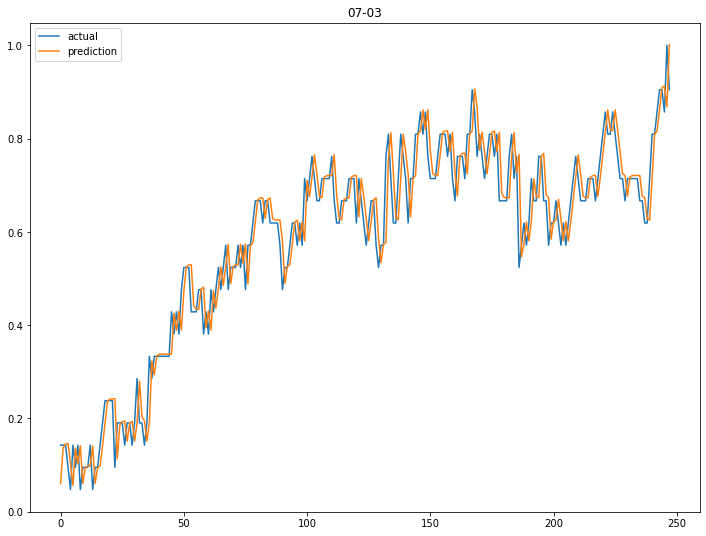

In [148]:
model.summary()

plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.title('07-03')
plt.savefig('savefig/cell7/07-03.png')
plt.legend()
plt.show()

In [149]:
loop = len(test_label)
for i in range(loop):
    error_avg = 0
    error = abs((test_label[i] - pred[i])/test_label[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

[0.04292648]


In [150]:
test_ds2 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_23.csv',delimiter=",", skiprows=1)

test_ds2 = scaler.fit_transform(test_ds2)
x_test2 = test_ds2[:, 1:2]
y_test2 = test_ds2[:, 1]

In [151]:
test_feature2, test_label2 = make_dataset(x_test2, y_test2, 10)

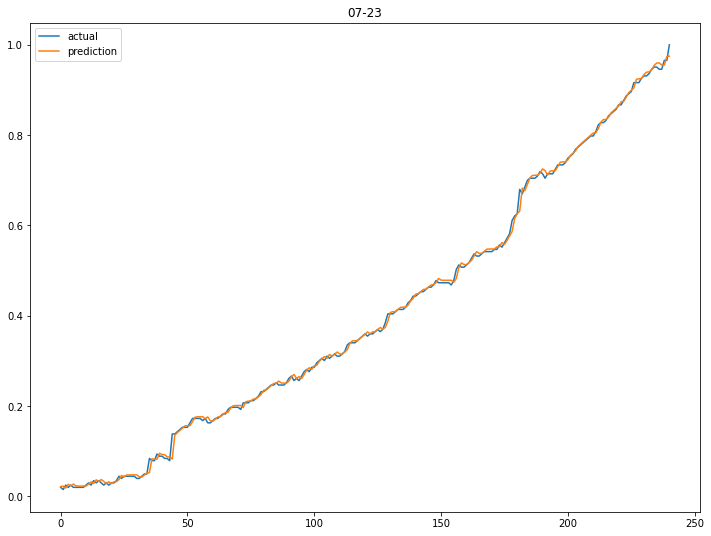

[0.01042836]


In [152]:
pred2 = model.predict(test_feature2)

plt.figure(figsize=(12, 9))
plt.plot(test_label2, label='actual')
plt.plot(pred2, label='prediction')
plt.title('07-23')
plt.savefig('savefig/cell7/07-23.png')
plt.legend()
plt.show()
loop = len(test_label2)
for i in range(loop):
    error_avg = 0
    error = abs((test_label2[i] - pred2[i])/test_label2[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

[0.00097679]


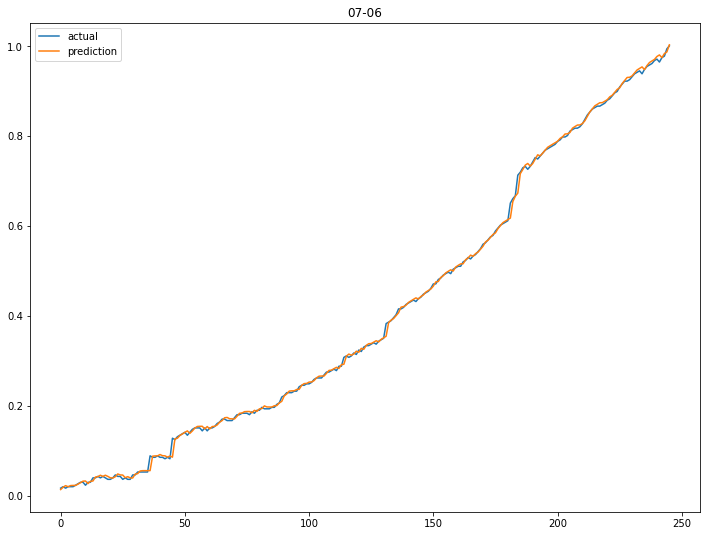

In [153]:
test_ds3 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_06.csv',delimiter=",", skiprows=1)

test_ds3 = scaler.fit_transform(test_ds3)
x_test3 = test_ds3[:, 1:2]
y_test3 = test_ds3[:, 1]
test_feature3, test_label3 = make_dataset(x_test3, y_test3, 10)

pred3 = model.predict(test_feature3)

loop = len(test_label3)
for i in range(loop):
    error_avg = 0
    error = abs((test_label3[i] - pred3[i])/test_label3[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label3, label='actual')
plt.plot(pred3, label='prediction')
plt.title('07-06')
plt.savefig('savefig/cell7/07-06.png')
plt.legend()
plt.show()


[0.0096471]


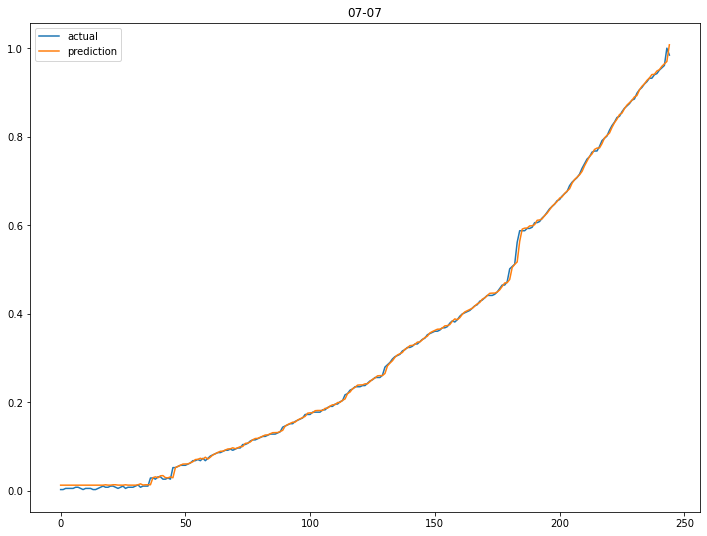

In [154]:
test_ds4 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_7.csv',delimiter=",", skiprows=1)
test_ds4 = scaler.fit_transform(test_ds4)
x_test4 = test_ds4[:, 1:2]
y_test4 = test_ds4[:, 1]
test_feature4, test_label4 = make_dataset(x_test4, y_test4, 10)

pred4 = model.predict(test_feature4)
loop = len(test_label4)
for i in range(loop):
    error_avg = 0
    error = abs((test_label4[i] - pred4[i])/test_label4[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label4, label='actual')
plt.plot(pred4, label='prediction')
plt.title('07-07')
plt.savefig('savefig/cell7/07-07.png')
plt.legend()
plt.show()

[0.01425965]


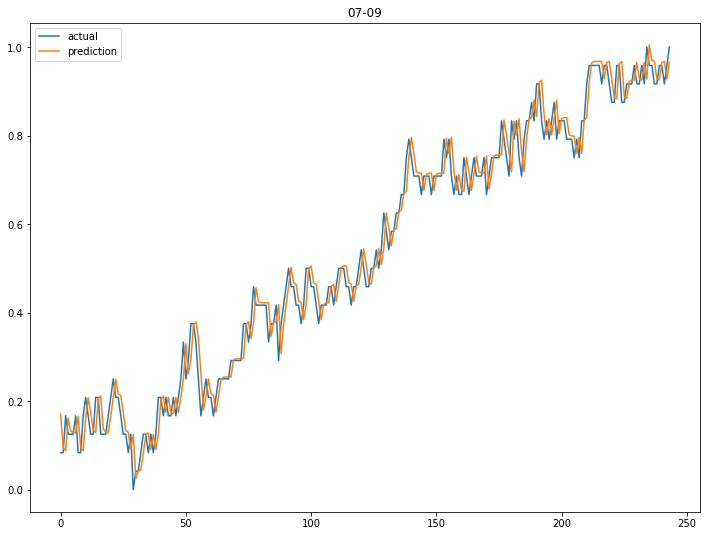

In [155]:
test_ds5 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_9.csv',delimiter=",", skiprows=1)
test_ds5 = scaler.fit_transform(test_ds5)
x_test5 = test_ds5[:, 1:2]
y_test5 = test_ds5[:, 1]
test_feature5, test_label5 = make_dataset(x_test5, y_test5, 10)

pred5 = model.predict(test_feature5)

loop = len(test_label5)
for i in range(loop):
    error_avg = 0
    if test_label5[i]!=0:
        error = abs((test_label5[i] - pred5[i])/test_label5[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label5, label='actual')
plt.plot(pred5, label='prediction')
plt.title('07-09')
plt.savefig('savefig/cell7/07-09.png')
plt.legend()
plt.show()

[0.00346399]


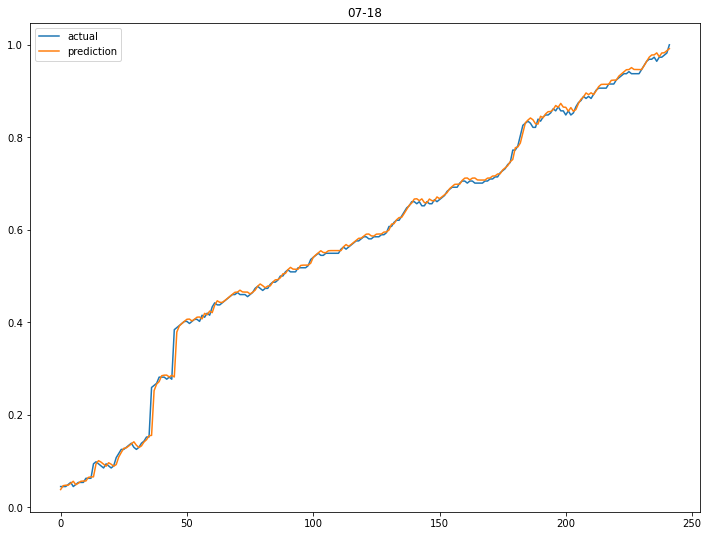

In [156]:
test_ds6 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_18.csv',delimiter=",", skiprows=1)
test_ds6 = scaler.fit_transform(test_ds6)
x_test6 = test_ds6[:, 1:2]
y_test6 = test_ds6[:, 1]
test_feature6, test_label6 = make_dataset(x_test6, y_test6, 10)

pred6 = model.predict(test_feature6)

loop = len(test_label6)
for i in range(loop):
    error_avg = 0
    error = abs((test_label6[i] - pred6[i])/test_label6[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label6, label='actual')
plt.plot(pred6, label='prediction')
plt.title('07-18')
plt.savefig('savefig/cell7/07-18.png')
plt.legend()
plt.show()

[0.1017254]


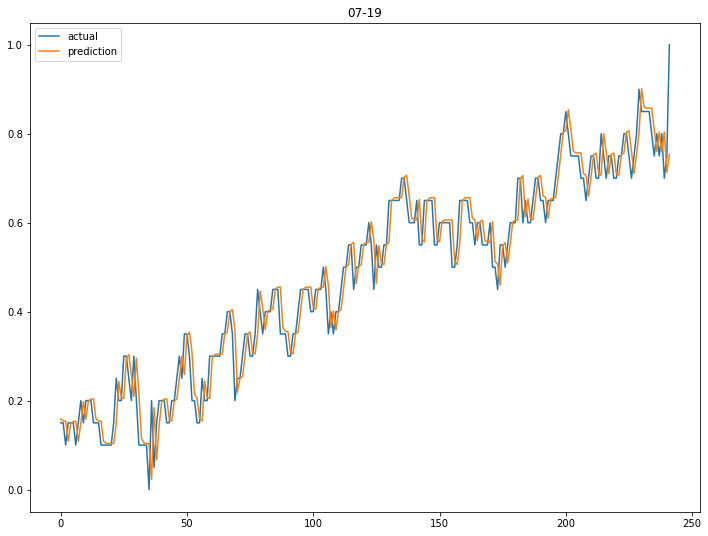

In [157]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_19.csv',delimiter=",", skiprows=1)
test_ds7 = scaler.fit_transform(test_ds7)
x_test7 = test_ds7[:, 1:2]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7, 10)

pred7 = model.predict(test_feature7)

loop = len(test_label7)
for i in range(loop):
    error_avg = 0
    if test_label7[i]!=0:
        error = abs((test_label7[i] - pred7[i])/test_label7[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.title('07-19')
plt.savefig('savefig/cell7/07-19.png')
plt.legend()
plt.show()

[0.00600697]


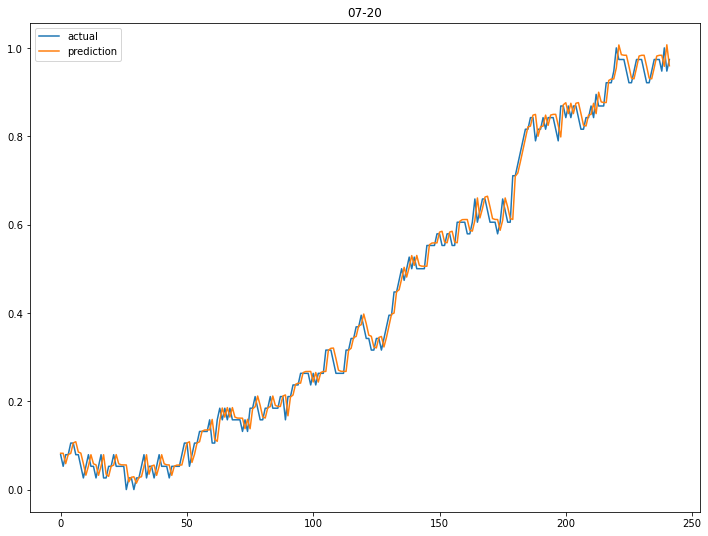

In [158]:
test_ds7 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_20.csv',delimiter=",", skiprows=1)
test_ds7 = scaler.fit_transform(test_ds7)
x_test7 = test_ds7[:, 1:2]
y_test7 = test_ds7[:, 1]
test_feature7, test_label7 = make_dataset(x_test7, y_test7, 10)

pred7 = model.predict(test_feature7)

loop = len(test_label7)
for i in range(loop):
    error_avg = 0
    if test_label7[i]!=0:
        error = abs((test_label7[i] - pred7[i])/test_label7[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label7, label='actual')
plt.plot(pred7, label='prediction')
plt.title('07-20')
plt.savefig('savefig/cell7/07-20.png')
plt.legend()
plt.show()

(251, 4)
[0.02154846]


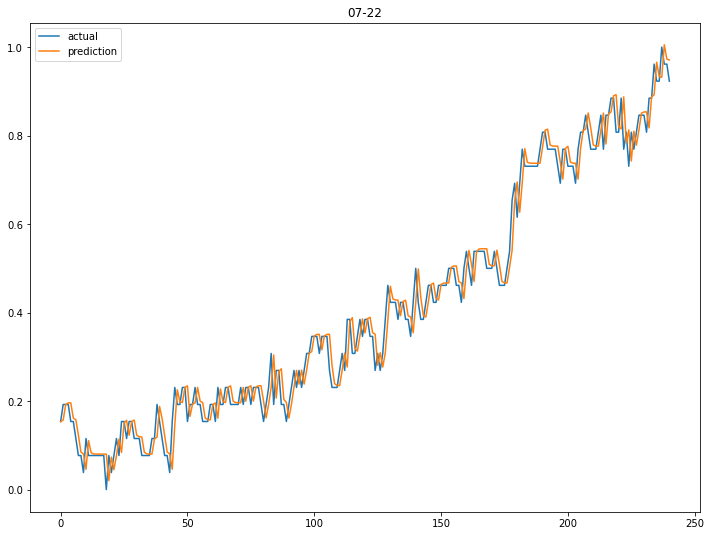

In [159]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)

pred8 = model.predict(test_feature8)

loop = len(test_label8)
for i in range(loop):
    error_avg = 0
    if test_label8[i]!=0:
        error = abs((test_label8[i] - pred8[i])/test_label8[i] * 100)
    error_avg = error_avg + error

error_avg = error_avg / loop
print(error_avg)

plt.figure(figsize=(12, 9))
plt.plot(test_label8, label='actual')
plt.plot(pred8, label='prediction')
plt.title('07-22')
plt.savefig('savefig/cell7/07-22.png')
plt.legend()
plt.show()

In [160]:
print(pred8.shape)
print(test_feature8.shape)

(241, 1)
(241, 10, 1)


In [161]:
def predict_next_timestamp(model, history):
    """Predict the next time stamp given a sequence of history data"""

    prediction = model.predict(history)
    prediction = np.reshape(prediction, (prediction.size,))
    return prediction

In [162]:
xhat = test_feature8[0]
xxhat = np.array([xhat])
print(xxhat.shape)
tttest=model.predict(xxhat)

(1, 10, 1)


In [163]:
testpred = np.zeros((300,1))
testpred.shape


(300, 1)

In [164]:

for i in range(300):
    expred = model.predict(np.array([xhat]))
    testpred[i] = expred
    xhat = np.vstack([xhat[1:],expred])

print(testpred.shape)
'''
i=0
expred = model.predict(np.array([xhat]))
testpred[i] = expred
xhat = np.vstack([xhat[1:],expred])

testpred.shape'''
'''
xhat = test_feature8
test1 = np.zeros((20,10,1))
print(test1.shape, xhat.shape)
testfe = np.concatenate((xhat,test1), axis=0)
testfe.shape'''

(300, 1)


'\nxhat = test_feature8\ntest1 = np.zeros((20,10,1))\nprint(test1.shape, xhat.shape)\ntestfe = np.concatenate((xhat,test1), axis=0)\ntestfe.shape'

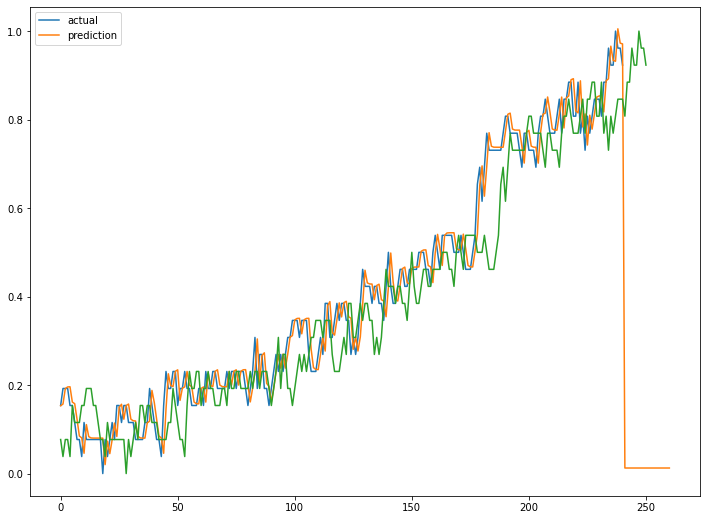

In [165]:
testpred = model(testfe)
plt.figure(figsize=(12, 9))
plt.plot(test_label8, label='actual')
plt.plot(testpred, label='prediction')
plt.plot(y_test8)
plt.legend()
plt.show()

In [209]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)

for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[240].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    x_test8 = x_test8[1:]
    y_test8 = y_test8[1:]
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(251, 4)
[array([[0.97101396]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.9341811]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.9777213]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.94516593]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.9848265]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.9560919]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.99228245]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.9670108]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[1.0001004]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.9779058]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[1.008239]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[0.9888216]], dtype=float32)]
(1, 1)
(251, 1) (251, 1)
(251, 1) (251, 1)
[array([[1.016700

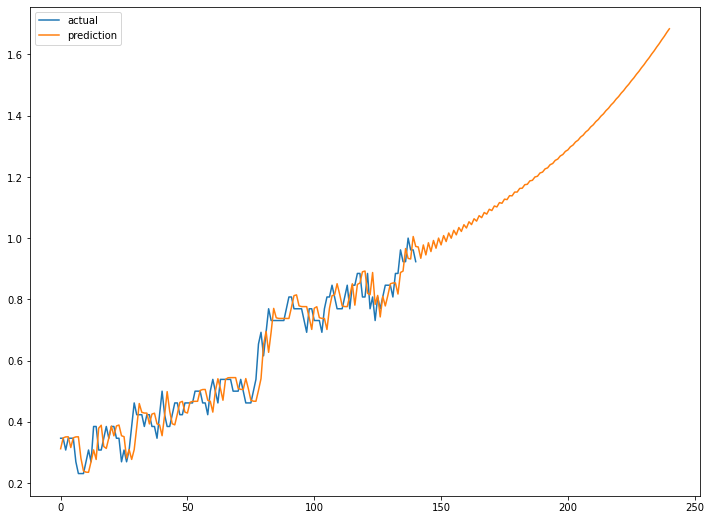

In [210]:
ac_test_label8 = ac_test_label8[100:]

plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.legend()
plt.show()

In [215]:
test_ds8 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_22.csv',delimiter=",", skiprows=1)
test_ds8 = scaler.fit_transform(test_ds8)
print(test_ds8.shape)
x_test8 = test_ds8[:, 1:2]
y_test8 = test_ds8[:, 1]
ac_y_test8 = y_test8
ac_y_test8 = ac_y_test8[29:]
ac_test_feature8, ac_test_label8 = make_dataset(x_test8, y_test8, 10)
x_test8 = test_ds8[:200, 1:2]
y_test8 = test_ds8[:200, 1]
test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)


for i in range(100):
    plz_pred = model.predict(test_feature8)
    pred_len = len(plz_pred)
    add_pred = plz_pred[pred_len-1].reshape((1,1))
    print([add_pred])
    print(add_pred.shape)
    x_test8 = np.append(x_test8, add_pred)
    y_test8 = np.append(y_test8, add_pred)
    test_len = len(x_test8)
    x_test8 = x_test8.reshape((test_len,1))
    y_test8 = y_test8.reshape((test_len,1))
    print(x_test8.shape,y_test8.shape)
    test_feature8, test_label8 = make_dataset(x_test8, y_test8, 10)
    print(x_test8.shape,y_test8.shape)
  #  print(x_test8.shape)
#print(y_test8.shape)



(251, 4)
[array([[0.7374891]], dtype=float32)]
(1, 1)
(201, 1) (201, 1)
(201, 1) (201, 1)
[array([[0.77351046]], dtype=float32)]
(1, 1)
(202, 1) (202, 1)
(202, 1) (202, 1)
[array([[0.74621415]], dtype=float32)]
(1, 1)
(203, 1) (203, 1)
(203, 1) (203, 1)
[array([[0.77812415]], dtype=float32)]
(1, 1)
(204, 1) (204, 1)
(204, 1) (204, 1)
[array([[0.75469226]], dtype=float32)]
(1, 1)
(205, 1) (205, 1)
(205, 1) (205, 1)
[array([[0.7830289]], dtype=float32)]
(1, 1)
(206, 1) (206, 1)
(206, 1) (206, 1)
[array([[0.7629608]], dtype=float32)]
(1, 1)
(207, 1) (207, 1)
(207, 1) (207, 1)
[array([[0.78819007]], dtype=float32)]
(1, 1)
(208, 1) (208, 1)
(208, 1) (208, 1)
[array([[0.77105194]], dtype=float32)]
(1, 1)
(209, 1) (209, 1)
(209, 1) (209, 1)
[array([[0.7935776]], dtype=float32)]
(1, 1)
(210, 1) (210, 1)
(210, 1) (210, 1)
[array([[0.7789939]], dtype=float32)]
(1, 1)
(211, 1) (211, 1)
(211, 1) (211, 1)
[array([[0.79916555]], dtype=float32)]
(1, 1)
(212, 1) (212, 1)
(212, 1) (212, 1)
[array([[0.7

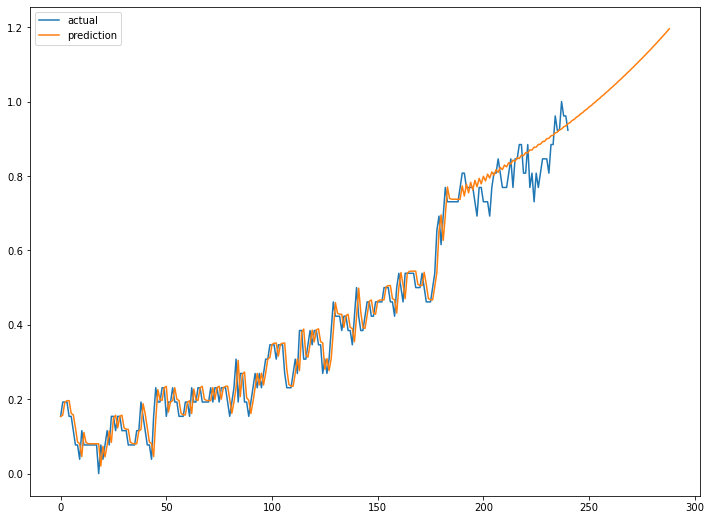

In [216]:
plt.figure(figsize=(12, 9))
plt.plot(ac_test_label8, label='actual')
plt.plot(plz_pred, label='prediction')
plt.legend()
plt.show()

In [166]:
expred = model.predict(test_feature8)
expred2 = np.zeros((1,1))
exprediction = np.append(expred2, expred)
expred = model.predict(exprediction)

exprediction.shape

ValueError: in user code:

    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    F:\program\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)


In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label8, label='actual')
plt.plot(exprediction, label='prediction')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label8, label='actual')
plt.plot(pred8, label='prediction')
plt.legend()
plt.show()

In [ ]:
zerotest = np.zeros((300,10,1))
zerotest = test_feature8
zerotest.shape